#__☄️ Asteroid Size Classification By Dídac Cayuela ☄️__

## Project Information

- **Group members**: Garv Trivedi
- **Project name**: Asteroid Size Classification
- **Dataset link**: [Asteroid Dataset on Kaggle](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset)
- **Amount of data**: 958,524 unique values (rows)
    - Train Dataset: 766,819 rows (80% of total)
    - Test Dataset: 191,705 rows (20% of total)
- **Size of Export**: 191 MB
    - Train Dataset: Approximately 152.8 MB
    - Test Dataset: Approximately 38.2 MB

![Asteroid banner](https://storage.googleapis.com/kaggle-datasets-images/689444/1208351/b8bffe6d189efafe10015e5d7156c049/dataset-cover.jpg?t=2020-06-02-16-15-17)

## Objective of the System

The objective is to classify asteroids into five size categories: very small, small, medium, large, and very large based on their characteristics.

## Features of the System

The relevant features for this classification task include:

- **Absolute Magnitude Parameter (H)**
    - *Definition*: A measure of how bright a Solar System object would appear if it were located at a Standard distance of 1 AU. Absolute magnitude measurements allow astronomers to compare the inherent brightness of objects, regardless of their distance from earth.
    - *Typology*: Dependent, attribute, continuous.
    - *Implication*: Indicates the asteroid's inherent luminosity, potentially correlated with its size.
    
- **Eccentricity (e)**
    - *Definition*: Degree of orbit deviation from a perfect circle.
    - *Typology*: Dependent, attribute, continuous.
    - *Implication*: Influences the asteroid's distance from the Sun which could be an indicator of the asteroid creation process.

<center>
    <img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/eccentricity.jpg" alt="Eccentricity">
</center>

    
- **Semi-major Axis (a)**
    - *Definition*: <del>Average distance from the Sun in astronomical units(au).</del> equal to the distance from the center of the ellipse to one end of the ellipse. [(Reason of correction)](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes#Average_distance)
    - *Typology*: Dependent, attribute, continuous.
    - *Implication*: A fundamental parameter in determining the asteroid's size within its orbit, distance from the sun can have an effect on the asteroid’s temperature over many years thus affecting its size.
    
- **Perihelion Distance (q)**
    - *Definition*: Closest approach of the asteroid's orbit to the Sun.
    - *Typology*: Dependent, attribute, continuous.
    - *Implication*: Affects the asteroid's temperature and potentially its size.

<center>
    <img src="https://i.stack.imgur.com/R3DI2.jpg" alt="Magnitude Explanation">
</center>

    
- **Inclination (i)**
    - *Definition*: Angle of orbit inclination relative to the ecliptic plane.
    - *Typology*: Dependent, attribute, continuous.
    - *Implication*: Provides insights into the orbital characteristics and potential size implications of the asteroid.
    
- **Time of Perihelion Passage (tp)**
    - *Definition*: Timing of the asteroid's closest approach to the Sun.
    - *Typology*: Dependent, attribute, continuous.
    - *Implication*: Offers temporal information relevant to the asteroid's orbit and potential size determinants.
    
- **Asteroid Class**
    - *Definition*: Categorization of asteroids into classes such as MBA (Main Belt Asteroid) or OMB (Outer Main Belt).
    - *Typology*: Dependent, attribute, categorical.
    - *Implication*: Provides contextual information influencing the distribution of asteroid sizes. They share similar characteristics but they have slightly different orbital dynamics due to their location within the asteroid belt.
    
- **NEO Flag (Near-Earth Object)**
    - *Definition*: Identification of asteroids classified as near-Earth objects.
    - *Typology*: Dependent, attribute, categorical.
    - *Implication*: Indicates the proximity of the asteroid to Earth, potentially influencing its size and relevance to the classification task.

![Kerbin](https://wiki.kerbalspaceprogram.com/images/thumb/4/41/Kerbalinclinedorbit.jpg/300px-Kerbalinclinedorbit.jpg)

## Potential Drawbacks

1. Imbalanced Class Distribution: The dataset exhibits an imbalance in the distribution of classes, particularly in features such as the NEO flag and asteroid class. This class imbalance could lead to biased predictions, where the model may favor the majority class and struggle to accurately classify instances belonging to the minority classes.

2. Variability in measurement methods for asteroid properties could introduce inconsistencies in the dataset.

3. The chosen features may not fully capture the complexity of asteroid size, leading to potential misclassifications.

## Initial Hypothesis

I hypothesize that the absolute magnitude parameter (H) will be a strong indicator of asteroid size. Additionally, certain orbital characteristics such as eccentricity, semi-major axis, perihelion distance, and inclination may also correlate with asteroid size. By utilizing these features, I expect to develop an effective classification model for categorizing asteroids into size classes.


# 1. Dependencies






In [3]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go
import requests
import seaborn as sns
import subprocess

from google.colab import drive
from os import sep
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'matplotlib'

# 2. Presets

## 2.1 Static Values

In [2]:
PAIA_FOLDER = 'PAIA'  # My PAIA folder name
PROJECT_NAME = 'Asteroid_Size_Classification'  # Project Name

PROJECTS_ROUTE = 'drive' + sep + 'MyDrive' + sep + PAIA_FOLDER + sep + 'projects' + sep
START_PROJECT = PROJECTS_ROUTE + PROJECT_NAME + sep

PATH_NOTEBOOKS = 'notebooks'
PATH_DATA_RAW = 'data' + sep + 'raw' + sep
PATH_DATA_PROCESSED = 'data' + sep + 'processed' + sep
PATH_MODELS = 'models' + sep

DATASET_URL = 'sakhawat18/asteroid-dataset'

Link this notebook with google colab

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Point at the project we will work on

In [4]:
%cd $START_PROJECT

[Errno 2] No such file or directory: 'drive/MyDrive/PAIA/projects/Asteroid_Size_Classification/'
/content


## 2.2 General Functions

In [5]:
TRUE_CONDITIONS = ['y', 'yes']

def handle_requests_response(response, store_path, check_save=False, df_name=''):
    print('> Found', len(response.content.decode('utf-8').split('\n')), 'lines aprox., proceed to store them?')
    df_name = df_name + '.csv' if '.csv' not in df_name else df_name
    store_csv = input('\tYes(Y)/No(N): ')

    if store_csv.lower() in TRUE_CONDITIONS:
        print('\t> Response to CSV....')
        fname = store_path + df_name
        csv_file = open(fname, 'wb')
        csv_file.write(response.content)
        csv_file.close()
        check_save and print('\t> Is CSV file ready?', os.path.isfile(fname))

In [6]:
def split_df(df, train_pct=0.8):
    train_size = int(len(df) * train_pct)
    print('- Total size:', len(df))

    train, test = df.iloc[:train_size], df.iloc[train_size:]

    print('- Train size:', len(train))
    print('- Test size:', len(test), end='\n\n')

    print('Any omissions?', len(df) != len(train) + len(test))
    print('Any overlapping?', (train.iloc[-1] == test.iloc[0]).values[0])

    return train, test

In [7]:
prepare_path = lambda path: not os.path.exists(path) and os.makedirs(path)

In [8]:
prepare_path(PATH_NOTEBOOKS)
prepare_path(PATH_DATA_RAW)
prepare_path(PATH_DATA_PROCESSED)
prepare_path(PATH_MODELS)

False

In [9]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_validation(model, x_test, y_test, plot_samples=0, units=''):
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('- MAE:\t\t', round(mae, 4), units)
    print('- MSE:\t\t', round(mse, 4), units + '2' if units else '')
    print('- RMSE:\t\t', round(rmse, 4), units)
    print('- var(Y_pred):\t', round(y_pred.var(), 4), units + '2' if units else '')
    print('- std(Y_pred):\t', round(y_pred.std(), 4), units)
    print('- R2:\t\t', round(r2, 4), end='\n\n')

    x_test = x_test if plot_samples == 0 else x_test.iloc[:plot_samples]
    y_test = y_test if plot_samples == 0 else y_test.iloc[:plot_samples]
    y_pred = y_pred if plot_samples == 0 else y_pred[:plot_samples]
    fig = plt.figure(figsize=(7, 3))
    ax1 = sns.scatterplot(x=x_test['width'], y=y_test, label='Test')
    ax2 = sns.scatterplot(x=x_test['width'], y=y_pred, label='Pred')
    ax2.axhline(y_test.mean(), ls='-', color='green', linewidth=2.5, label='Mean')
    plt.legend()
    plt.title('Predicted Test Data')
    plt.show()

## 2.3 Plot Functions

In [10]:
# Original code: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


def plot_silouette_score(data, model, range_n_clusters:list, figsize=(18, 7), plot_sil_scores=False):
    """Performs a full Silouette score plotting analysis ready for interpretation

    Parameters
    ----------
    data : pd.DataFrame, required
        Dataframe made by 2 or more (PCA(2) will be applied) columns
    model: sklearn.cluster.KMeans
        Clustering model.

    Raises
    ------
    ValueError
        If data does not provide at least two columns for 2D-based plots.
    """

    if len(data.columns) <= 1: raise ValueError('Data needs at least 2 columns!')
    avg_sil_scores = [] # [(avg_score, n_clusters)]
    X = data.values if len(data.columns) == 2 else PCA(n_components=2).fit_transform(data)

    for idx, n_clusters in enumerate(range_n_clusters):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(*figsize)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        model = km_models[idx]
        cluster_labels = model.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        avg_sil_scores.append((silhouette_avg, n_clusters))
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                              ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors,
            edgecolor="k"
        )
        centers = model.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white",
                    alpha=1, s=200, edgecolor="k")
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50,
                        edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
    plt.show()

    avg_sil_scores = np.array(avg_sil_scores)
    fig = plt.figure()
    fig.set_size_inches(*figsize)
    plt.plot(avg_sil_scores[:, 1], [np.mean(avg_sil_scores[:, 0])] * len(avg_sil_scores), '--r',
             label='average silhouette scores')
    plt.plot(avg_sil_scores[:, 1], avg_sil_scores[:, 0], '-bo', label='single silhouette score')
    plt.ylim(0, 1)
    plt.legend()
    plt.title('Silhouette curve')
    plt.show()

In [11]:
# Original code: https://scikit-learn.org/0.16/auto_examples/cluster/plot_kmeans_digits.html

def advanced_cluster_plot(data, model, ax, step_size=.02):
    h = .02

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    ax.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    ax.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
    centroids = model.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    ax.set_title('K-means clustering for n_clusters: ' + str(model.n_clusters) + '\n' + \
                 'Centroids are marked with white cross')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def advanced_kmeans(data, n_clusters, random_state=42, figsize=(20, 5), ncols=3, plotting=True):
    """Performs a full K-means train-&-plot procedure showing the resulting clusters

    Parameters
    ----------
    data : pd.DataFrame, required
        Dataframe made by 2 or more (PCA(2) will be applied) columns
    n_clusters: int/list
        Number of clusters to fit the data into them.
        If list is provided a multiple-model analysis will be performed.
    random_state: int
        Determines random number generation for centroid initialization.
        Use an int to make the randomness deterministic.
    figsize: (int, int)
        Modify the plots size for better visualitzation.
    ncols: int
        #Columns which will compose the resulting plots when len(n_clusters) > 1.
    plotting: bool
        If set to "False", the function will return a list of
        sklearn.cluster.KMeans trained models over the n_clusters provided.
        If set to "True", the function will also plot the resulting clusters
        ranges.

    Raises
    ------
    ValueError
        If data does not provide at least two columns for 2D-based plots.
    """

    if len(data.columns) <= 1: raise ValueError('Data needs at least 2 columns!')
    n_clusters = [n_clusters] if type(n_clusters) != list else n_clusters
    reduced_data = (data.to_numpy() if len(data.columns) == 2 else PCA(n_components=2).fit_transform(data))
    kms = map(lambda x: KMeans(init='k-means++', n_clusters=x, random_state=random_state).fit(reduced_data),
              n_clusters)
    if not plotting: return kms

    nrows = math.ceil(len(n_clusters) / ncols)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize[0], figsize[1]*nrows))
    for idx, km in enumerate(kms):
        advanced_cluster_plot(reduced_data,
                              km,
                              axs[idx // 3, idx % 3] if nrows >= 2 else axs[idx % 3])
    for idx in range(len(n_clusters), nrows*ncols):
        fig.delaxes(axs[idx // 3, idx % 3] if nrows >= 2 else axs[idx % 3])
    plt.show()
    return kms

# 3. Data Downloading 📄

In [12]:
filename = "asteroid_df" #@param {type:"string"}
force_download = True #@param {type:"boolean"}

csv_file_path = os.path.join(PATH_DATA_RAW, filename + '.csv')

# Check if the file already exists or force download is enabled
if force_download:
    # Execute the Kaggle command to download the dataset
    subprocess.run(['kaggle', 'datasets', 'download', '-d', DATASET_URL, '-p', PATH_DATA_RAW])

    # Get the list of files in the raw data directory
    files_in_raw = os.listdir(PATH_DATA_RAW)

    # Find the downloaded zip file
    zip_file = [file for file in files_in_raw if file.endswith('.zip')]

    # If zip file(s) found, extract the first one
    if zip_file:
        zip_file_path = os.path.join(PATH_DATA_RAW, zip_file[0])
        subprocess.run(['unzip', '-o', zip_file_path, '-d', PATH_DATA_RAW])

        # Remove the downloaded zip file
        os.remove(zip_file_path)

        # Rename the CSV file if found
        csv_file = [file for file in os.listdir(PATH_DATA_RAW) if file.endswith('.csv')]
        if csv_file:
            old_csv_path = os.path.join(PATH_DATA_RAW, csv_file[0])
            new_csv_path = os.path.join(PATH_DATA_RAW, filename + '.csv')
            os.rename(old_csv_path, new_csv_path)
        else:
            print("No CSV file found in the raw data directory.")
    else:
        print("No zip file found in the raw data directory.")
else:
    print('> Download process was skipped')

# 4. Data Loading 📂

In [13]:
asteroids_df_raw = pd.read_csv(PATH_DATA_RAW + 'asteroid_df.csv', dtype={'Column3': int, 'Column4': str, 'Column5': str})
print(asteroids_df_raw.head())
asteroids_df_raw = pd.read_csv(PATH_DATA_RAW + 'asteroid_df.csv', index_col=0)

<ipython-input-13-ab31dc20a630>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroids_df_raw = pd.read_csv(PATH_DATA_RAW + 'asteroid_df.csv', dtype={'Column3': int, 'Column4': str, 'Column5': str})


         id    spkid       full_name pdes     name prefix neo pha     H  \
0  a0000001  2000001         1 Ceres    1    Ceres    NaN   N   N  3.40   
1  a0000002  2000002        2 Pallas    2   Pallas    NaN   N   N  4.20   
2  a0000003  2000003          3 Juno    3     Juno    NaN   N   N  5.33   
3  a0000004  2000004         4 Vesta    4    Vesta    NaN   N   N  3.00   
4  a0000005  2000005       5 Astraea    5  Astraea    NaN   N   N  6.90   

   diameter  ...       sigma_i      sigma_om       sigma_w      sigma_ma  \
0   939.400  ...  4.608900e-09  6.168800e-08  6.624800e-08  7.820700e-09   
1   545.000  ...  3.469400e-06  6.272400e-06  9.128200e-06  8.859100e-06   
2   246.596  ...  3.223100e-06  1.664600e-05  1.772100e-05  8.110400e-06   
3   525.400  ...  2.170600e-07  3.880800e-07  1.789300e-07  1.206800e-06   
4   106.699  ...  2.740800e-06  2.894900e-05  2.984200e-05  8.303800e-06   

       sigma_ad       sigma_n      sigma_tp     sigma_per  class      rms  
0  1.111300e-11 

<ipython-input-13-ab31dc20a630>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroids_df_raw = pd.read_csv(PATH_DATA_RAW + 'asteroid_df.csv', index_col=0)


# 5. Data Preliminary Inspection 👁️

In [14]:
asteroids_df_raw

,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,,,,,,,,,,,,,,,,,,,,,
a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.0900,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.1010,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.2140,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.4228,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.2740,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556


In [15]:
asteroids_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958524 entries, a0000001 to bT3S2678
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           958524 non-null  int64  
 1   full_name       958524 non-null  object 
 2   pdes            958524 non-null  object 
 3   name            22064 non-null   object 
 4   prefix          18 non-null      object 
 5   neo             958520 non-null  object 
 6   pha             938603 non-null  object 
 7   H               952261 non-null  float64
 8   diameter        136209 non-null  float64
 9   albedo          135103 non-null  float64
 10  diameter_sigma  136081 non-null  float64
 11  orbit_id        958524 non-null  object 
 12  epoch           958524 non-null  float64
 13  epoch_mjd       958524 non-null  int64  
 14  epoch_cal       958524 non-null  float64
 15  equinox         958524 non-null  object 
 16  e               958524 non-null  float64
 17  a     

In [16]:
asteroids_df_raw.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


### Conclusions?

- Index column: `id`
- Mixed/Unknown units: none
- Confusing names: single letter abbreviations (H, e, q, i, tp...)
- NaN presence: `name`, `prefix`, `neo`, `pha`, `H`, `diameter`, `albedo`, `diameter_sigma`, `moid`, `moid_ld`, `sigma_e`, `sigma_a`, `sigma_q`, `sigma_i`, `sigma_om`, `sigma_w`, `sigma_ma`, `sigma_ad`, `sigma_n`, `sigma_tp`, `sigma_per`, `rms`
- High NaN presence: `name`, `prefix`, `diameter`, `albedo`, `diameter_sigma`, `moid`, `sigma_e`, `sigma_a`, `sigma_q`, `sigma_i`, `sigma_om`, `sigma_w`, `sigma_ma`, `sigma_ad`, `sigma_n`, `sigma_tp`, `sigma_per`, `rms`
- Comma-Dot mixed behaviour: None
- 'Y'/'N' behaviour: `neo`, `pha`
- Wrong data types "dtypes": None



### Transform [T] or filter [F] operations

- Mixed/Unknown units: `name`
- **[T]** Confusing names: single letter abbreviations (H, e, q, i, tp...)
- **[F]** NaN presence: `name`, `prefix`, `neo`, `pha`, `H`, `diameter`, `albedo`, `diameter_sigma`, `moid`, `moid_ld`, `sigma_e`, `sigma_a`, `sigma_q`, `sigma_i`, `sigma_om`, `sigma_w`, `sigma_ma`, `sigma_ad`, `sigma_n`, `sigma_tp`, `sigma_per`, `rms`
- **[F]** High NaN presence: `name`, `prefix`, `diameter`, `albedo`, `diameter_sigma`, `moid`, `sigma_e`, `sigma_a`, `sigma_q`, `sigma_i`, `sigma_om`, `sigma_w`, `sigma_ma`, `sigma_ad`, `sigma_n`, `sigma_tp`, `sigma_per`, `rms`
- **[T]** 'Y'/'N' behaviour: `neo`, `pha`


# 6. Data Manipulation 🛠️

## 6.1 NaN/High-NaN presence

In [17]:
asteroids_df_raw.isna().sum()

,0
spkid,0
full_name,0
pdes,0
name,936460
prefix,958506
neo,4
pha,19921
H,6263
diameter,822315
albedo,823421


In [18]:
asteroids_df_raw.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           0 non-null      int64  
 1   full_name       0 non-null      object 
 2   pdes            0 non-null      object 
 3   name            0 non-null      object 
 4   prefix          0 non-null      object 
 5   neo             0 non-null      object 
 6   pha             0 non-null      object 
 7   H               0 non-null      float64
 8   diameter        0 non-null      float64
 9   albedo          0 non-null      float64
 10  diameter_sigma  0 non-null      float64
 11  orbit_id        0 non-null      object 
 12  epoch           0 non-null      float64
 13  epoch_mjd       0 non-null      int64  
 14  epoch_cal       0 non-null      float64
 15  equinox         0 non-null      object 
 16  e               0 non-null      float64
 17  a               0 non-null      float64
 18  q      

### 6.1.1 Avoid Worst Case Scenario



**In order to avoid getting the WCS for null filtering we will keep only the data we'll be using to train our model:**


> Absolute Magnitude Parameter (H), Eccentricity (e), Semi-major Axis (a), Perihelion Distance (q), Inclination (i), Time of Perihelion Passage (tp), Asteroid Class, NEO Flag (Near-Earth Object). Also we need to keep **diameter** (the magnitude we want to predict)

In [19]:
columns_to_keep = ['neo','H', 'e', 'a', 'q', 'i', 'tp', 'class', 'diameter']

# Create a copy of the DataFrame with only the specified columns
asteroids_df1 = asteroids_df_raw.copy(deep=True)[columns_to_keep]

In [20]:
# Drop rows with missing values
asteroids_df1 = asteroids_df1.dropna()

In [21]:
# Print DataFrame information
asteroids_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132045 entries, a0000001 to bK17B98V
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   neo       132045 non-null  object 
 1   H         132045 non-null  float64
 2   e         132045 non-null  float64
 3   a         132045 non-null  float64
 4   q         132045 non-null  float64
 5   i         132045 non-null  float64
 6   tp        132045 non-null  float64
 7   class     132045 non-null  object 
 8   diameter  132045 non-null  float64
dtypes: float64(7), object(2)
memory usage: 10.1+ MB


## 6.2 'Y'/'N' behaviour

In [22]:
len(asteroids_df1['neo'].unique())

2

In [23]:
asteroids_df1['neo'].value_counts()

,count
neo,
N,131200
Y,845


Here we can see the class imbalance we were talking about earlier and that could introduce some bias into our model

In [24]:
asteroids_df2 = asteroids_df1.replace({'neo': {'Y': True, 'N': False}})
asteroids_df2['neo'].value_counts()

,count
neo,
False,131200
True,845


## 6.3 Confusing names

In [25]:
asteroids_df = asteroids_df2.rename(columns={'H': 'absolute_magnitude', 'e': 'eccentricity', 'a': 'semi-major_axis', 'q': 'perihelion_distance', 'i': 'inclination', 'tp': 'time_perihelion', 'class': 'belt_class'})
asteroids_df.info()
asteroids_df

<class 'pandas.core.frame.DataFrame'>
Index: 132045 entries, a0000001 to bK17B98V
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   neo                  132045 non-null  bool   
 1   absolute_magnitude   132045 non-null  float64
 2   eccentricity         132045 non-null  float64
 3   semi-major_axis      132045 non-null  float64
 4   perihelion_distance  132045 non-null  float64
 5   inclination          132045 non-null  float64
 6   time_perihelion      132045 non-null  float64
 7   belt_class           132045 non-null  object 
 8   diameter             132045 non-null  float64
dtypes: bool(1), float64(7), object(1)
memory usage: 9.2+ MB


,neo,absolute_magnitude,eccentricity,semi-major_axis,perihelion_distance,inclination,time_perihelion,belt_class,diameter
id,,,,,,,,,
a0000001,False,3.40,0.076009,2.769165,2.558684,10.594067,2.458239e+06,MBA,939.400
a0000002,False,4.20,0.229972,2.773841,2.135935,34.832932,2.458321e+06,MBA,545.000
a0000003,False,5.33,0.256936,2.668285,1.982706,12.991043,2.458446e+06,MBA,246.596
a0000004,False,3.00,0.088721,2.361418,2.151909,7.141771,2.458248e+06,MBA,525.400
a0000005,False,6.90,0.190913,2.574037,2.082619,5.367427,2.458926e+06,MBA,106.699
...,...,...,...,...,...,...,...,...,...
bK16N24W,False,17.40,0.074890,2.550597,2.359584,11.583615,2.459489e+06,MBA,2.696
bK16N35R,False,16.80,0.221008,3.144963,2.449900,17.970692,2.459650e+06,MBA,2.917
bK16P66B,False,17.20,0.287894,3.050244,2.172096,14.461482,2.459597e+06,MBA,3.271


## 6.4 Encode the str-like columns remaining

In [26]:
# See how many belt classes there are
asteroids_df['belt_class'].value_counts()

,count
belt_class,
MBA,121122
OMB,7360
TJN,1873
APO,483
IMB,451
MCA,325
AMO,267
ATE,95
CEN,50


In [27]:
from sklearn.preprocessing import LabelEncoder

asteroids_copy = asteroids_df.copy()
le = LabelEncoder()
le.fit(asteroids_copy['belt_class'])
asteroids_copy['belt_class'] = le.transform(asteroids_copy['belt_class'])
asteroids_copy.head()

,neo,absolute_magnitude,eccentricity,semi-major_axis,perihelion_distance,inclination,time_perihelion,belt_class,diameter
id,,,,,,,,,
a0000001,False,3.40,0.076009,2.769165,2.558684,10.594067,2.458239e+06,6,939.400
a0000002,False,4.20,0.229972,2.773841,2.135935,34.832932,2.458321e+06,6,545.000
a0000003,False,5.33,0.256936,2.668285,1.982706,12.991043,2.458446e+06,6,246.596
a0000004,False,3.00,0.088721,2.361418,2.151909,7.141771,2.458248e+06,6,525.400
a0000005,False,6.90,0.190913,2.574037,2.082619,5.367427,2.458926e+06,6,106.699


In [28]:
unique_belt_classes = asteroids_copy['belt_class'].unique()
print(unique_belt_classes)

[ 6  8  7  0  5  9  4  1  3  2 10]


In [29]:
# Check new encoding
asteroids_copy['belt_class'].value_counts()

,count
belt_class,
6,121122
8,7360
9,1873
1,483
5,451
7,325
0,267
3,95
4,50


**Problem with LabelEncoder:** The LabelEncoder assigns arbitrary integers to each category in the belt_class column, which could incorrectly imply an ordinal relationship (e.g., that MBA < OMB < TJN). This is not appropriate because belt_class categories are nominal and have no natural order.

**Solution with OneHotEncoder:** The OneHotEncoder transforms the belt_class column into multiple binary columns (one for each category). This way, each category is represented by a separate column, ensuring there is no implied order. For example, belt_class_MBA, belt_class_OMB, etc., will each be a column with values of 0 or 1, indicating the presence or absence of that category.

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Perform one-hot encoding on the 'belt_class' column
belt_class_encoded = ohe.fit_transform(asteroids_df[['belt_class']])

# Convert the array to a DataFrame and add appropriate column names
belt_class_encoded_df = pd.DataFrame(belt_class_encoded,
                                     columns=[f'belt_class_{cat}' for cat in ohe.categories_[0]])

# Add the new one-hot encoded columns to the original DataFrame
asteroids_df = pd.concat([asteroids_df.reset_index(drop=True), belt_class_encoded_df.reset_index(drop=True)], axis=1)

# Drop the original 'belt_class' column as it is now redundant
asteroids_df = asteroids_df.drop(columns=['belt_class'])

# Verify the changes
print(asteroids_df.head())

# Check new encoding
print(asteroids_df.columns)
print(asteroids_df.iloc[:, -len(belt_class_encoded_df.columns):].head())  # Print only the new one-hot encoded columns to verify

     neo  absolute_magnitude  eccentricity  semi-major_axis  \
0  False                3.40      0.076009         2.769165   
1  False                4.20      0.229972         2.773841   
2  False                5.33      0.256936         2.668285   
3  False                3.00      0.088721         2.361418   
4  False                6.90      0.190913         2.574037   

   perihelion_distance  inclination  time_perihelion  diameter  \
0             2.558684    10.594067     2.458239e+06   939.400   
1             2.135935    34.832932     2.458321e+06   545.000   
2             1.982706    12.991043     2.458446e+06   246.596   
3             2.151909     7.141771     2.458248e+06   525.400   
4             2.082619     5.367427     2.458926e+06   106.699   

   belt_class_AMO  belt_class_APO  belt_class_AST  belt_class_ATE  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0

## 6.5 Add Size categorical class

In order to be able to better work with the data i'll be adding a clategorical class called size to separate the asteroids between different size categories based on the diameter

In [31]:
import pandas as pd

# Define the bins for size categories
bins = [0, 50, 100, 200, 300, float('inf')]  # Adjust the bin sizes as needed

# Define the labels for the size categories
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

# Use pd.cut() to categorize the 'diameter' values into the defined bins
asteroids_df['size'] = pd.cut(asteroids_df['diameter'], bins=bins, labels=labels, right=False)

# Display the first few rows of the DataFrame to verify the new 'Size' column
print(asteroids_df[['diameter', 'size']].head())


   diameter        size
0   939.400  Very Large
1   545.000  Very Large
2   246.596       Large
3   525.400  Very Large
4   106.699      Medium


In [32]:
asteroids_df['size'].value_counts()

,count
size,
Very Small,131282
Small,523
Medium,208
Large,23
Very Large,9


### We've got a problem here

There's a very uneven distribution of asteroids for each class, which could later cause our model to become lazy and just spit out whatever class is more prominent in most cases (Very small in this case).

With the help of better partitioning we should get a more even class distribution.

This code is designed to partition the asteroid data into size categories by binning the 'diameter' values:

- **Calculate Total Asteroids:** It determines the total number of asteroids in the dataset.

- **Determine Desired Class Size:** It calculates the desired size of each class by dividing the total number of asteroids by the number of size categories.

- **Calculate Bin Edges:** It computes the bin edges based on the desired class size. It uses numpy's percentile function to calculate the percentile values corresponding to each size category, ensuring an equal distribution of asteroids across the categories.

- **Categorize Diameter Values:** It uses pd.cut() to categorize the 'diameter' values into the adjusted bins defined by the bin edges. This function assigns each diameter value to the appropriate size category based on the specified bins and labels.

**Verify Balance:** Finally, it prints the counts of asteroids in each size category to verify that the classes are balanced, meaning they contain roughly the same number of asteroids.

In [33]:
import numpy as np

# Calculate the total number of asteroids
total_asteroids = len(asteroids_df)

# Determine the desired class size
desired_class_size = total_asteroids // len(labels)

# Calculate the bin edges based on the desired class size
bin_edges = [np.percentile(asteroids_df['diameter'], percent) for percent in np.linspace(0, 100, len(labels) + 1)]

# Use pd.cut() to categorize the 'diameter' values into the adjusted bins
asteroids_df['size'] = pd.cut(asteroids_df['diameter'], bins=bin_edges, labels=labels, right=False)

# Display the size counts to verify balance
print(asteroids_df['size'].value_counts())


size
Medium        26442
Large         26410
Very Large    26409
Very Small    26393
Small         26390
Name: count, dtype: int64


Here we can see how the distribution has been made to ensure close to equal size of samples on all categories

In [34]:
for i in range(len(labels)):
    print(f"{labels[i]} -> {bin_edges[i + 1]}")

Very Small -> 2.609
Small -> 3.54
Medium -> 4.643
Large -> 6.453
Very Large -> 939.4


# 7. Data Deep Inspection 🔎

## 7.1 Performing a scatterplot that represents Semi-major Axis [a] (X coordinate) and diameter (Y coordinate)

As suggested in the comments recieved from our professor, the aim is to visually explore the relationship between the **Semi-major Axis (a)** and the **diameter of asteroids** in the dataset. The Semi-major Axis represents the longest radius of an asteroid's elliptical orbit around the sun, while the diameter indicates the size of the asteroid. By examining the correlation between these two features, insights into the distribution of asteroid sizes across different orbital distances will be gained. This visualization aims to uncover potential patterns or trends in the data related to asteroid size and orbital characteristics.

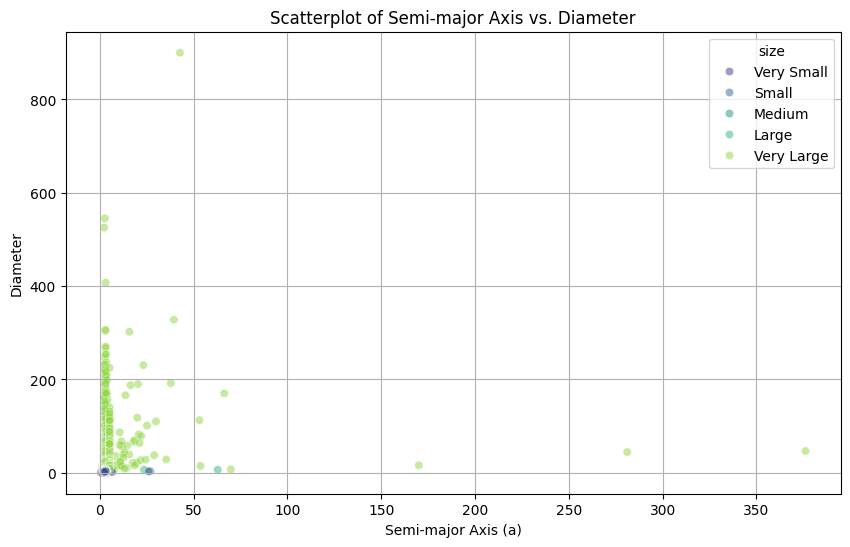

In [35]:
plt.figure(figsize=(10, 6))
#plt.scatter(asteroids_df['semi-major_axis'], asteroids_df['diameter'], alpha=0.5)
sns.scatterplot(data=asteroids_df, x='semi-major_axis', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Semi-major Axis vs. Diameter')
plt.xlabel('Semi-major Axis (a)')
plt.ylabel('Diameter')
plt.grid(True)

plt.show()

In [36]:
print(f"Maximum diameter: {asteroids_df['diameter'].max()}")
print(f"Minimum diameter: {asteroids_df['diameter'].min()}")

Maximum diameter: 939.4
Minimum diameter: 0.0025


### Let's take a closer look

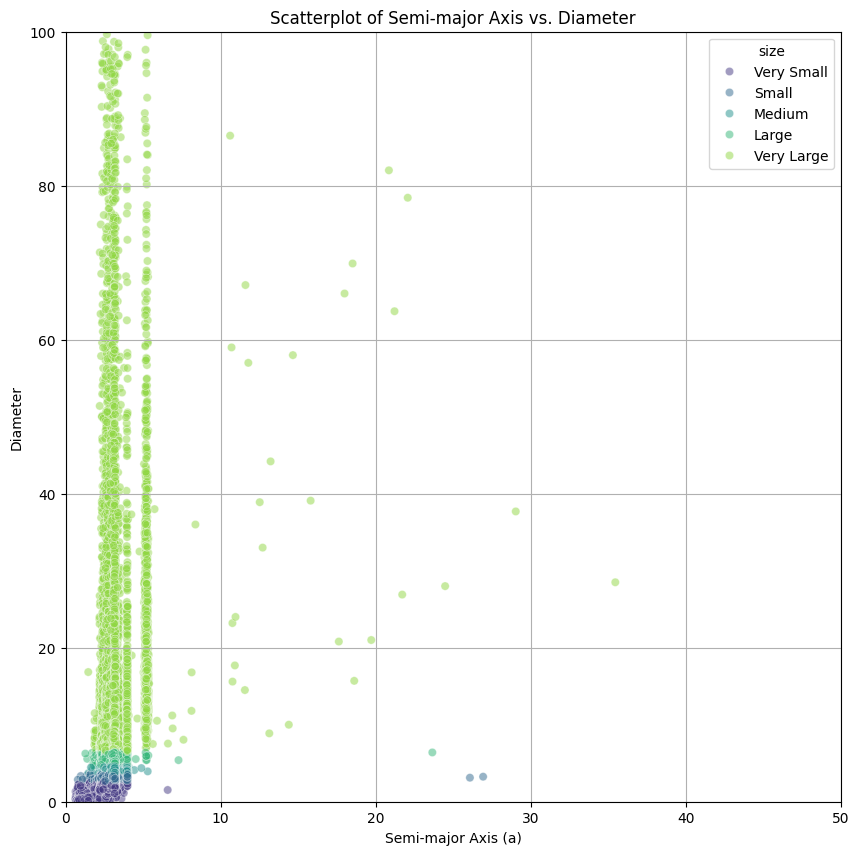

In [37]:
plt.figure(figsize=(10, 10))
#plt.scatter(asteroids_df['semi-major_axis'], asteroids_df['diameter'], alpha=0.5)
sns.scatterplot(data=asteroids_df, x='semi-major_axis', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Semi-major Axis vs. Diameter')
plt.xlabel('Semi-major Axis (a)')
plt.ylabel('Diameter')
plt.grid(True)

# Set limits for x-axis and y-axis
plt.xlim(0, 50)  # Limit x-axis
plt.ylim(0, 100)  # Limit y-axis
plt.show()

### Let's take an even closer look


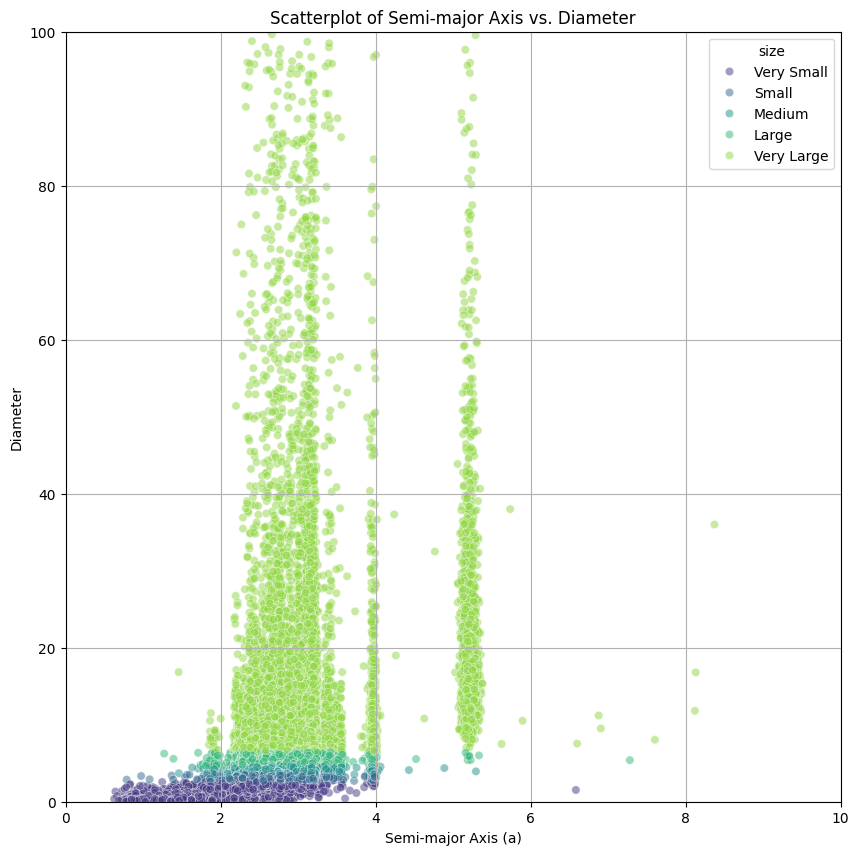

In [38]:
plt.figure(figsize=(10, 10))
#plt.scatter(asteroids_df['semi-major_axis'], asteroids_df['diameter'], alpha=0.5)
sns.scatterplot(data=asteroids_df, x='semi-major_axis', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Semi-major Axis vs. Diameter')
plt.xlabel('Semi-major Axis (a)')
plt.ylabel('Diameter')
plt.grid(True)

# Set limits for x-axis and y-axis
plt.xlim(0, 10)  # Limit x-axis
plt.ylim(0, 100)  # Limit y-axis
plt.show()

### Analysis of Scatterplot

The scatterplot illustrates the relationship between asteroid diameter and the semi-major axis (a), categorized by size (Very Small, Small, Medium, Large, Very Large). Most asteroids have diameters less than 40 units, with the largest reaching up to 100 units. The semi-major axis values range from 0 to 10 AU (astronomical units), with a notable clustering around specific values (approximately 2, 3.5, and 5 AU). The size categories show distinct distributions: Very Small and Small asteroids are densely packed with low diameters and semi-major axes; Medium asteroids, while still numerous, are more spread out; Large asteroids form vertical bands indicating specific semi-major axis ranges, with higher diameters; and Very Large asteroids, though few, are spread across the semi-major axis range.

There is a clear pattern where larger asteroids (Large and Very Large) tend to cluster around specific semi-major axis values, suggesting potential resonance or orbital grouping. This pattern might indicate that the semi-major axis is a significant feature for predicting asteroid size.

## 7.2 Exploring the Relationship Between diameter and Eccentricity

 we will examine the relationship between the diameter of asteroids and their Eccentricity.

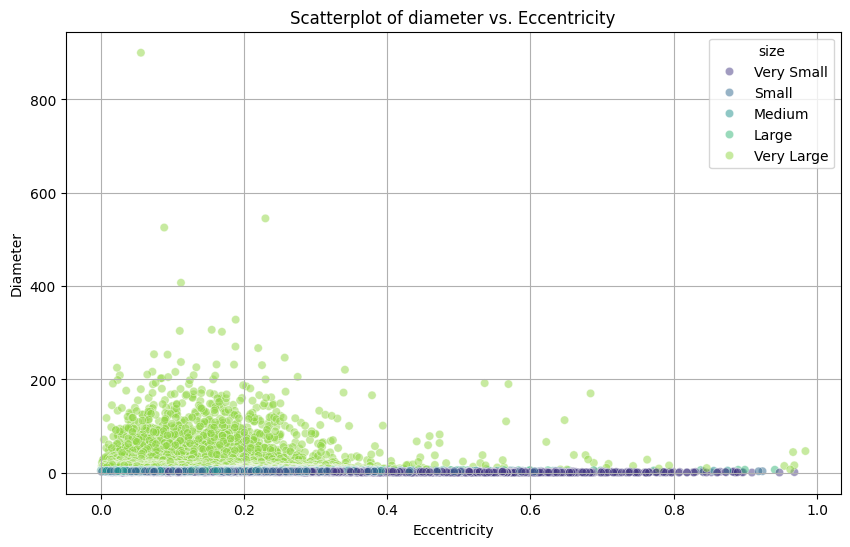

In [39]:
# Scatterplot of Size vs. Eccentricity
plt.figure(figsize=(10, 6))
#plt.scatter(asteroids_df['eccentricity'], asteroids_df['diameter'], alpha=0.5)
sns.scatterplot(data=asteroids_df, x='eccentricity', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of diameter vs. Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Diameter')
plt.grid(True)
plt.show()

### Let's take a closer look

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


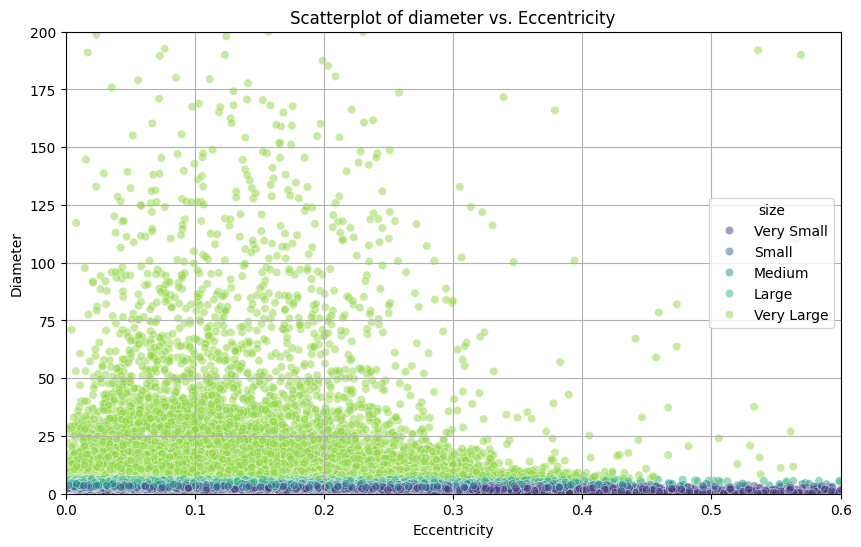

In [40]:
# Scatterplot of Size vs. Eccentricity
plt.figure(figsize=(10, 6))
#plt.scatter(asteroids_df['eccentricity'], asteroids_df['diameter'], alpha=0.5)
sns.scatterplot(data=asteroids_df, x='eccentricity', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of diameter vs. Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Diameter')
plt.xlim(0, 0.6)  # Limit x-axis
plt.ylim(0, 200)  # Limit y-axis
plt.grid(True)
plt.show()

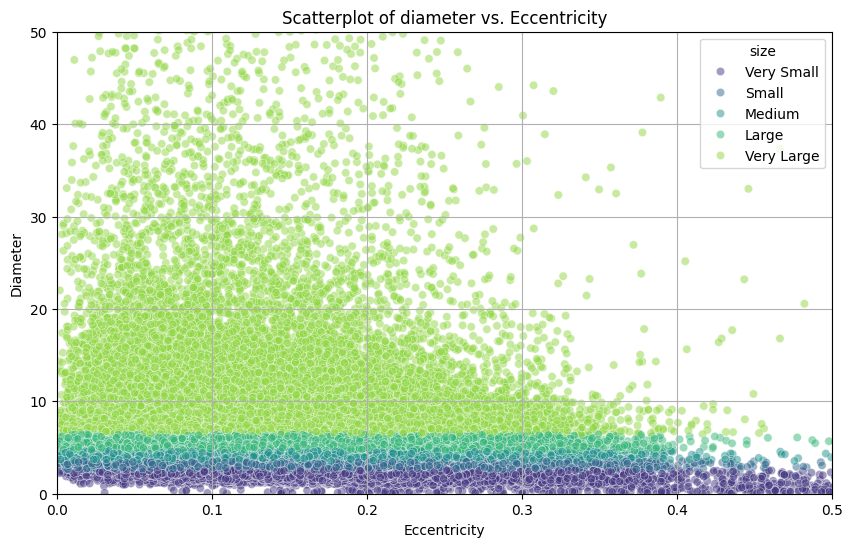

In [41]:
# Scatterplot of Size vs. Eccentricity
plt.figure(figsize=(10, 6))
#plt.scatter(asteroids_df['eccentricity'], asteroids_df['diameter'], alpha=0.5)
sns.scatterplot(data=asteroids_df, x='eccentricity', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of diameter vs. Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Diameter')
plt.xlim(0, 0.5)  # Limit x-axis
plt.ylim(0, 50)  # Limit y-axis
plt.grid(True)
plt.show()

### Analysis of Scatterplot

The scatterplot visualizes the relationship between asteroid diameter and eccentricity, categorized by size. Most asteroids have a diameter less than 200 km, with a few outliers reaching up to 800 km. Eccentricity values range from 0 to 1, with the majority of asteroids exhibiting low eccentricity (less than 0.4). The size categories show a clear distribution: Very Small and Small asteroids are densely packed with low diameters and eccentricity; Medium asteroids are less frequent with slightly higher diameters; Large asteroids are more spread out with diameters between 200-600 km; and Very Large asteroids, though few, have diameters up to 800 km and moderate eccentricity.

There is no evident correlation between eccentricity and diameter, suggesting that eccentricity alone may not be a strong predictor of asteroid size. This clustering of data points at lower eccentricity indicates that most asteroids have relatively circular orbits.


## 7.3 Exploring the relationship between diameter and perihelion distance (q)

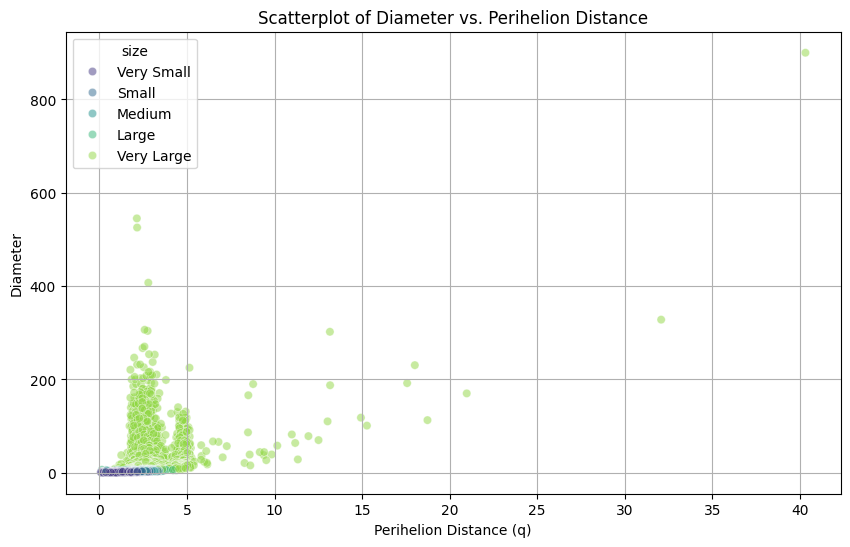

In [42]:
# Plotting the relationship between diameter and perihelion distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=asteroids_df, x='perihelion_distance', y='diameter', hue='size', palette='viridis', alpha=0.5)
#plt.scatter(asteroids_df['perihelion_distance'], asteroids_df['diameter'], alpha=0.5)
plt.title('Scatterplot of Diameter vs. Perihelion Distance')
plt.xlabel('Perihelion Distance (q)')
plt.ylabel('Diameter')
plt.grid(True)
plt.show()


Let's ignore the outliers for a moment and take a closer look

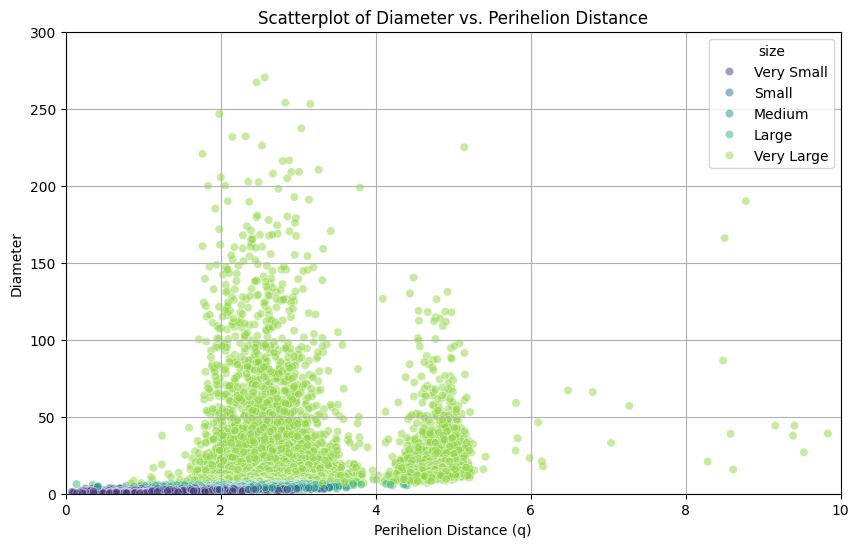

In [43]:
# Plotting the relationship between diameter and perihelion distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=asteroids_df, x='perihelion_distance', y='diameter', hue='size', palette='viridis', alpha=0.5)
#plt.scatter(asteroids_df['perihelion_distance'], asteroids_df['diameter'], alpha=0.5)
plt.title('Scatterplot of Diameter vs. Perihelion Distance')
plt.xlabel('Perihelion Distance (q)')
plt.ylabel('Diameter')
plt.grid(True)

plt.xlim(0, 10)  # Limit x-axis
plt.ylim(0, 300)  # Limit y-axis

plt.show()


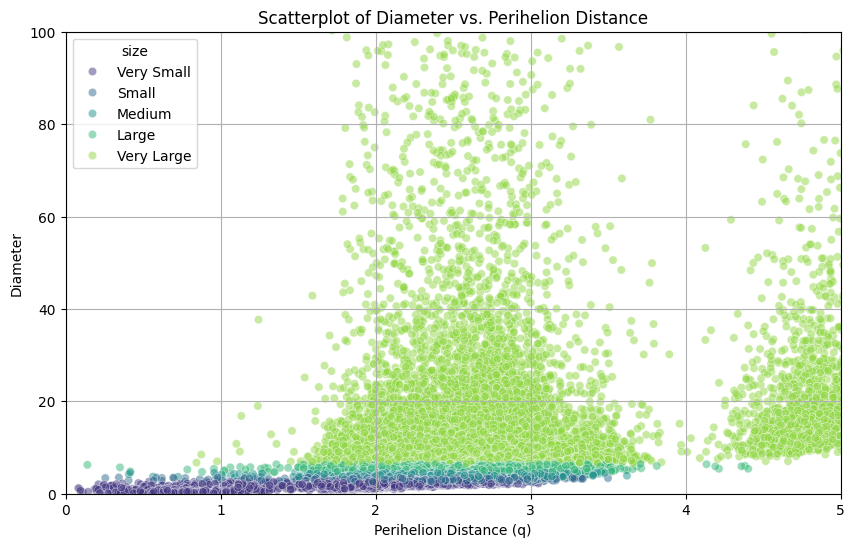

In [44]:
# Plotting the relationship between diameter and perihelion distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=asteroids_df, x='perihelion_distance', y='diameter', hue='size', palette='viridis', alpha=0.5)
#plt.scatter(asteroids_df['perihelion_distance'], asteroids_df['diameter'], alpha=0.5)
plt.title('Scatterplot of Diameter vs. Perihelion Distance')
plt.xlabel('Perihelion Distance (q)')
plt.ylabel('Diameter')
plt.grid(True)

plt.xlim(0, 5)  # Limit x-axis
plt.ylim(0, 100)  # Limit y-axis

plt.show()

### Analysis of Scatterplot

While there are a few outliers for larger perihelion distances larger than 6, we can see that the majority of asteroids concentrate arround 0 - 5 perihelion units.

This time arround it does seem like lower perihelion distances correlate to smaller asteroid sizes while larger perihelion distances show a portion of larger asteroids from our population data.

I'm specially interested on the smaller size cluster around the 0 - 1.5 q mark (small asteroids) as well as the 2-3 (medium / larger), 3 - 3.8 (medium / larger) and finally 4.2 - 5.5 (almost exclusively large)

It's curious seeing there are not a lot of asteroids around 4q.

## 7.4 Exploring the relationship between diameter and absolute magnitude (H)

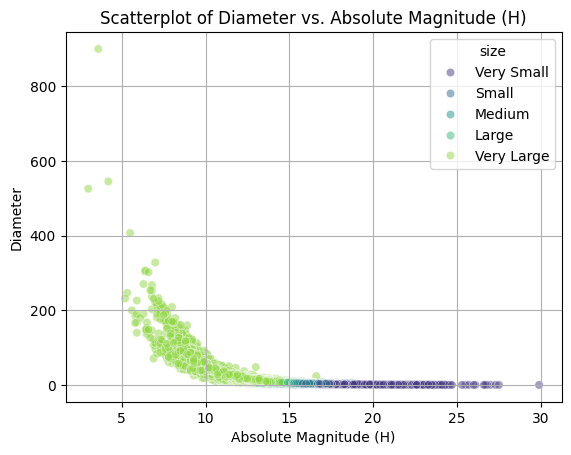

In [45]:
sns.scatterplot(data=asteroids_df, x='absolute_magnitude', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Diameter vs. Absolute Magnitude (H)')
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Diameter')
plt.grid(True)
plt.show()


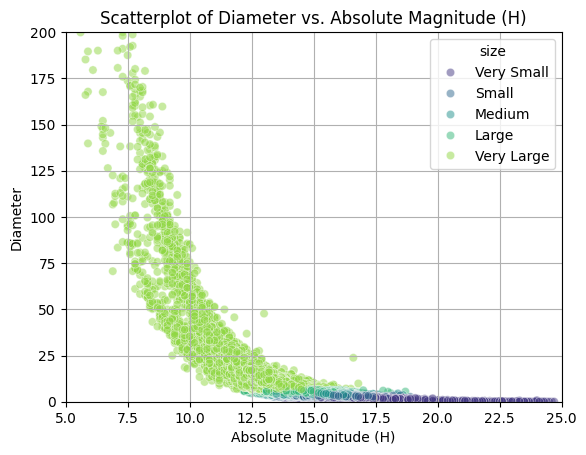

In [46]:
sns.scatterplot(data=asteroids_df, x='absolute_magnitude', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Diameter vs. Absolute Magnitude (H)')
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Diameter')
plt.grid(True)


plt.xlim(5, 25)  # Limit x-axis
plt.ylim(0, 200)  # Limit y-axis


plt.show()

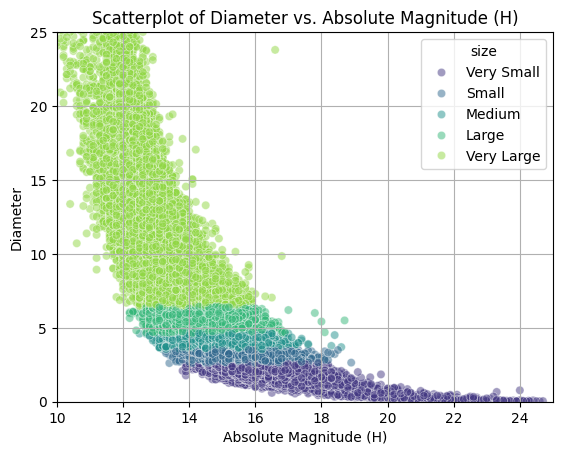

In [47]:
sns.scatterplot(data=asteroids_df, x='absolute_magnitude', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Diameter vs. Absolute Magnitude (H)')
plt.xlabel('Absolute Magnitude (H)')
plt.ylabel('Diameter')
plt.grid(True)


plt.xlim(10, 25)  # Limit x-axis
plt.ylim(0, 25)  # Limit y-axis


plt.show()

### Analysis of Scatterplot

When plotting Diameter vs Absolute Magnitude (H) we see very interesting results, there seems to be a very clear distribution of classes drawing a logarithmic falloff.

When remembering that Absolute Magnitude is the amount of inherent brightness of an asteroid, it is reasonable to think that larger asteroids, which have greater surface area to reflect sunlight, would exhibit lower absolute magnitudes (indicating they are brighter). Conversely, smaller asteroids with less surface area would have higher absolute magnitudes (indicating they are dimmer). This relationship suggests that the diameter of an asteroid is inversely related to its absolute magnitude, which explains the logarithmic falloff pattern observed in the scatterplot.

## 7.5 Exploring the relationship between inclination and diameter

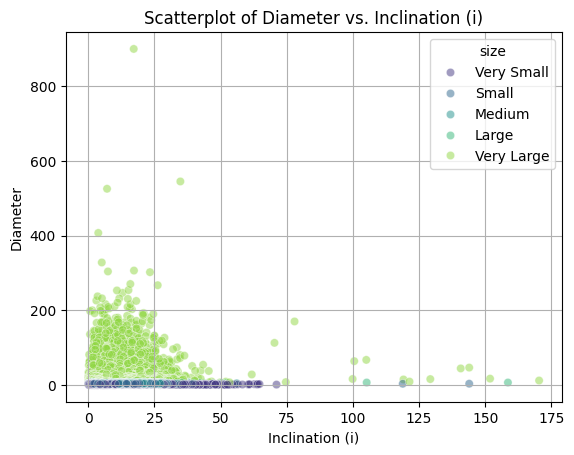

In [48]:
sns.scatterplot(data=asteroids_df, x='inclination', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Diameter vs. Inclination (i)')
plt.xlabel('Inclination (i)')
plt.ylabel('Diameter')
plt.grid(True)
plt.show()


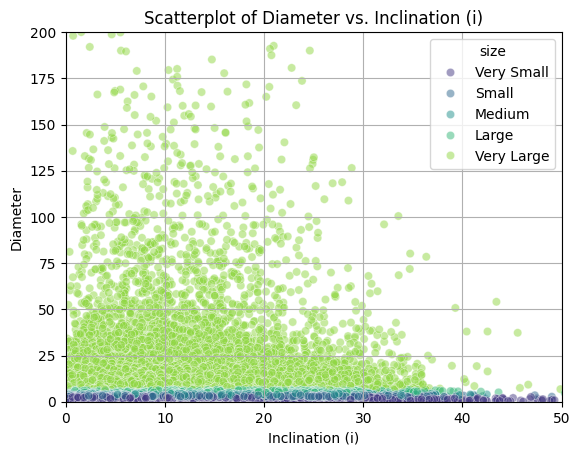

In [49]:
sns.scatterplot(data=asteroids_df, x='inclination', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Diameter vs. Inclination (i)')
plt.xlabel('Inclination (i)')
plt.ylabel('Diameter')
plt.grid(True)

plt.xlim(0, 50)  # Limit x-axis
plt.ylim(0, 200)  # Limit y-axis

plt.show()

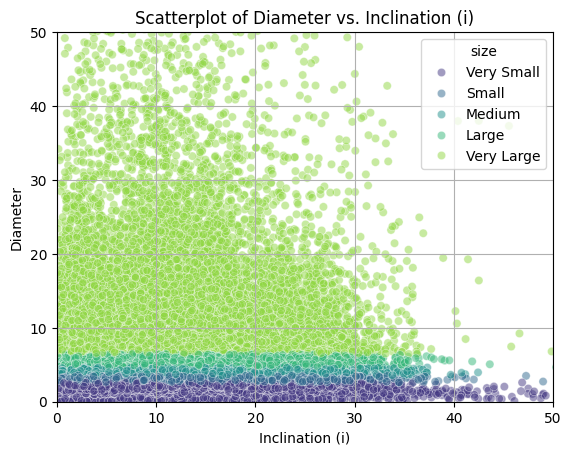

In [50]:
sns.scatterplot(data=asteroids_df, x='inclination', y='diameter', hue='size', palette='viridis', alpha=0.5)
plt.title('Scatterplot of Diameter vs. Inclination (i)')
plt.xlabel('Inclination (i)')
plt.ylabel('Diameter')
plt.grid(True)

plt.xlim(0, 50)  # Limit x-axis
plt.ylim(0, 50)  # Limit y-axis

plt.show()

### Analysis of Scatterplot

On this scatter plot we can se a very similar case to eccentricity where, at a first glance, there doesn't seem to be a any specific inclination range where the model could relate a size category with it's inclination.

It is worth noting that even though the distribution seems pretty homogeneous, in the range between 35 and upwards of inclination units, there seems to be lot less "very large" meteors with steep inclinations.

## 7.6 Exploring the correlations with a correlation matrix

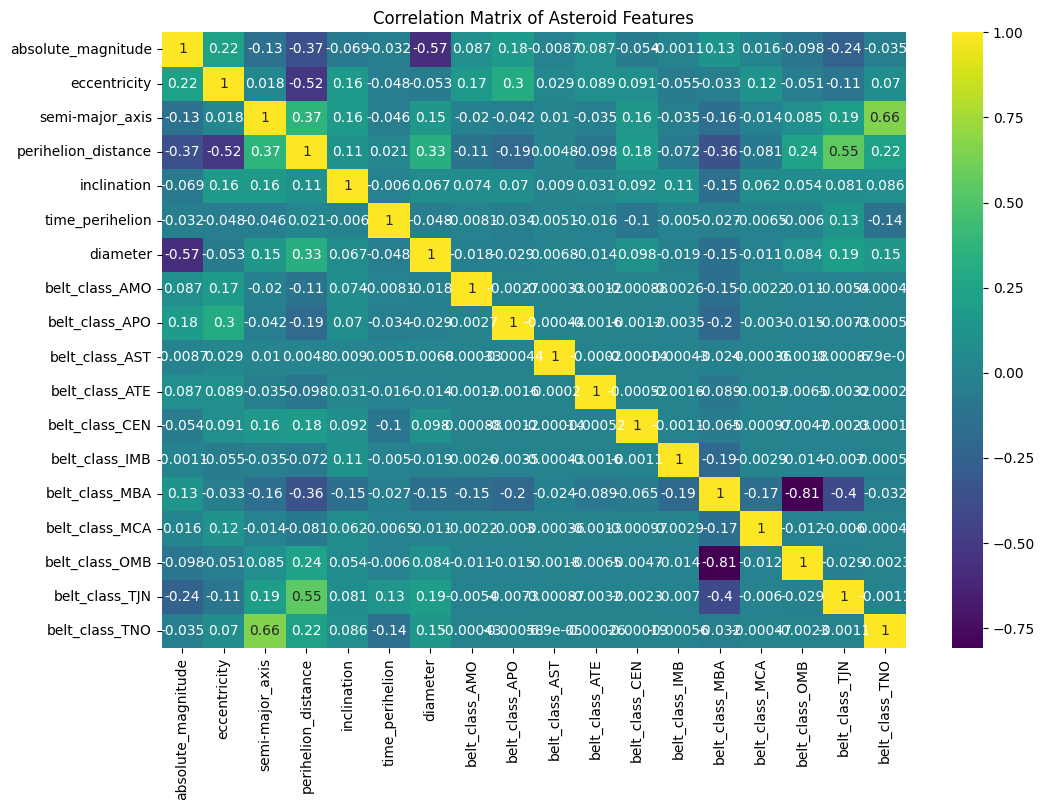

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = asteroids_df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Asteroid Features')
plt.show()

### Analysis of the matrix

The correlation matrix provides a comprehensive view of how various features of the asteroids dataset are interrelated. One of the most notable observations is the strong negative correlation between diameter and absolute magnitude (H), which is expected because a larger asteroid typically reflects more light, resulting in a lower absolute magnitude value. This inverse relationship suggests that absolute magnitude could be a reliable predictor of an asteroid's size, which aligns with the physical interpretation of these variables. The semi-major axis (a) and perihelion distance (q) also show moderate positive correlations with diameter, indicating that asteroids with larger orbits and closer approaches to the Sun tend to be larger in size. This could be due to the accumulation of material over time, leading to the growth of larger bodies.

Another interesting observation is the lack of strong correlation between diameter and other orbital parameters such as eccentricity (e) and inclination (i). This suggests that the shape and tilt of an asteroid's orbit do not significantly influence its size. However, it's important to note that these parameters might still play a role in other aspects of asteroid behavior, such as their stability and interaction with other bodies in the solar system.

Belt Classes and Size: Various belt classes (e.g., belt_class_MBA, belt_class_OMB) show correlations with diameter. For example, Main Belt Asteroids (MBA) have a notable negative correlation with diameter (-0.17), indicating that larger diameters are less common in the main belt.
Inter-Belt Class Correlations: Some belt classes show significant correlations among themselves. For instance, belt_class_MBA and belt_class_OMB have a strong negative correlation (-0.81), suggesting that these classes are distinct and not likely to overlap.

belt_class_TNO and semi-major_axis: There's a very strong positive correlation (0.66), indicating that Trans-Neptunian Objects (TNOs) are typically found at larger semi-major axes, which is consistent with their location in the outer solar system.
belt_class_TNO and perihelion_distance: Also shows a strong positive correlation (0.55), reinforcing that TNOs have orbits that keep them far from the Sun.
belt_class_TJN and semi-major_axis: Another significant positive correlation (0.66), indicating that Trojan asteroids are also located at larger semi-major axes.

Diameter vs. Orbital Parameters: While some orbital parameters show moderate correlations with diameter, it's evident that diameter is more closely linked with absolute magnitude than with any orbital characteristics.
One-Hot Encoded Belt Classes: The one-hot encoding of belt classes allows for a clearer understanding of how different classes are distributed and related to other features.

## 7.7 Identifying Potential Outliers with Boxplots

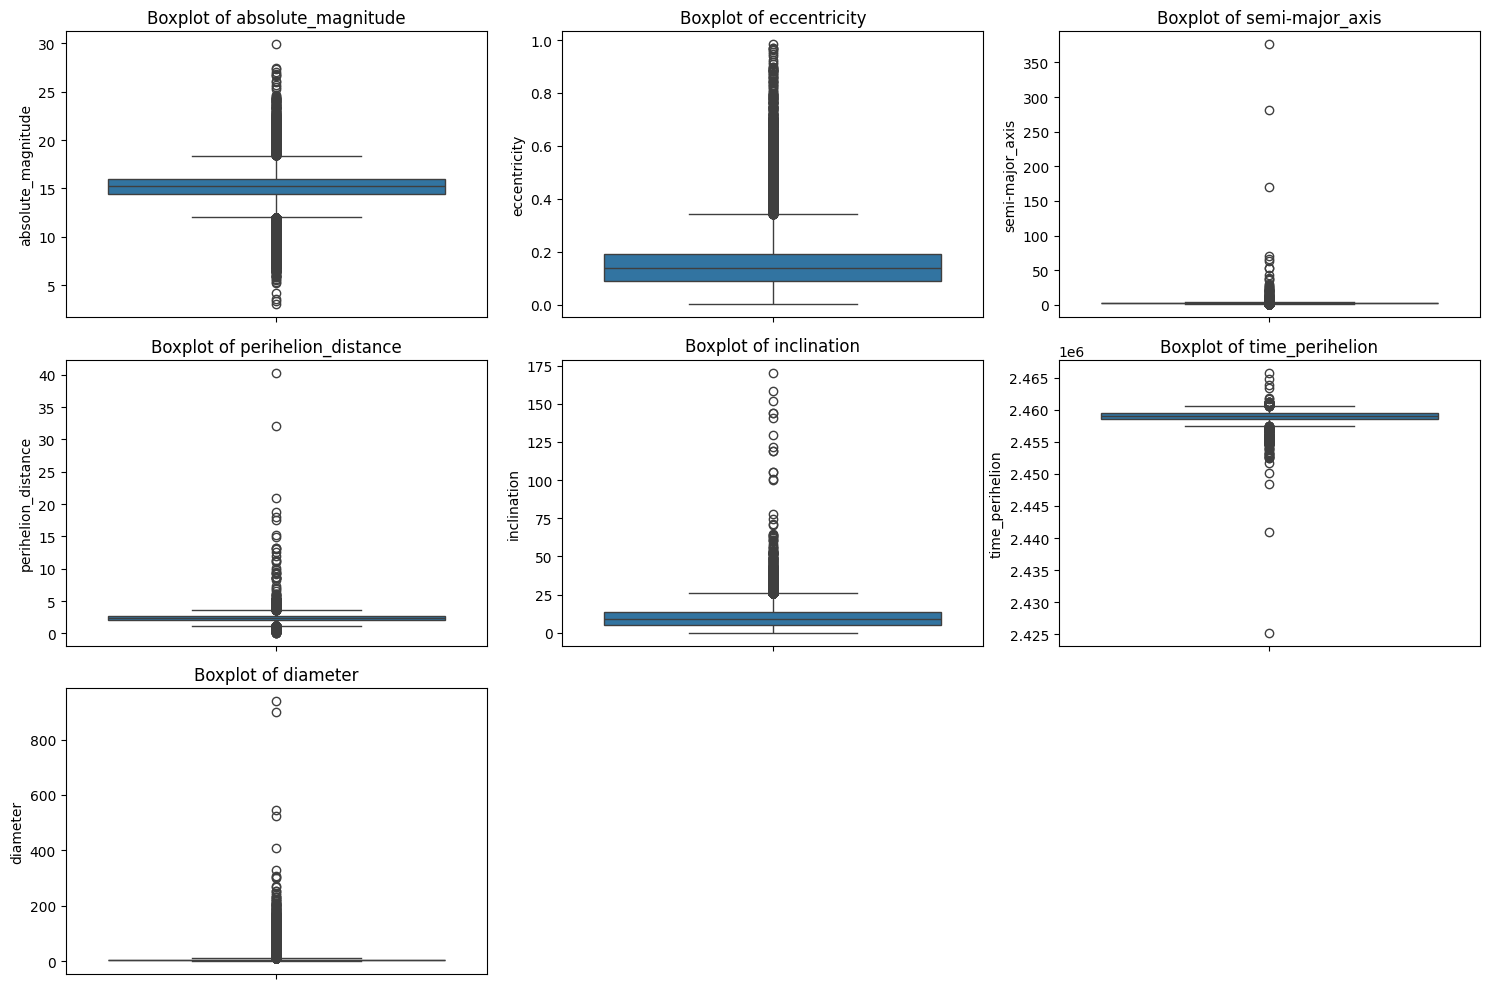

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to inspect
numerical_columns = [
    'absolute_magnitude', 'eccentricity', 'semi-major_axis',
    'perihelion_distance', 'inclination', 'time_perihelion', 'diameter'
]

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=asteroids_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()



The boxplot analysis of the numerical features in the asteroid dataset reveals several significant observations. Most features exhibit a considerable number of outliers, particularly absolute_magnitude, eccentricity, semi-major_axis, perihelion_distance, inclination, and time_perihelion. The absolute_magnitude feature shows a wide range with numerous outliers on both the lower and higher ends, indicating that there are asteroids with exceptionally high and low brightness values compared to the majority. Similarly, the eccentricity and semi-major_axis features have many outliers, suggesting the presence of asteroids with highly elliptical or unusually large orbits.

The perihelion_distance and inclination features also show numerous outliers. The outliers in perihelion_distance indicate asteroids that come exceptionally close to or far from the Sun compared to the typical range. The inclination feature displays outliers that suggest some asteroids have highly tilted orbits relative to the ecliptic plane. Additionally, the time_perihelion feature has a few outliers, indicating that the times at which some asteroids reach their closest approach to the Sun deviate significantly from the norm. Lastly, the diameter feature's outliers suggest a few asteroids are significantly larger than most. These outliers could impact the analysis and model performance, so further steps to address them—such as removal or transformation—may be necessary.

### Detecting Outliers Using Z-score and IQR

**Zscore Method**

In [53]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = asteroids_df[numerical_columns].apply(zscore)

# Define a threshold for Z-score
z_threshold = 3

# Find outliers
outliers_zscore = (z_scores.abs() > z_threshold).any(axis=1)

# Print the number of outliers detected
print(f'Number of outliers detected using Z-score: {outliers_zscore.sum()}')

# Filter out the outliers
asteroids_no_outliers_zscore = asteroids_df[~outliers_zscore]


Number of outliers detected using Z-score: 4983


**IRQ Method**

In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = asteroids_df[numerical_columns].quantile(0.25)
Q3 = asteroids_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for IQR
iqr_threshold = 1.5

# Find outliers
outliers_iqr = ((asteroids_df[numerical_columns] < (Q1 - iqr_threshold * IQR)) |
                (asteroids_df[numerical_columns] > (Q3 + iqr_threshold * IQR))).any(axis=1)

# Print the number of outliers detected
print(f'Number of outliers detected using IQR: {outliers_iqr.sum()}')

# Filter out the outliers
asteroids_no_outliers_iqr = asteroids_df[~outliers_iqr]


Number of outliers detected using IQR: 15614


**Replacing Outliers**

In [55]:
# Replace outliers with the median value of the column
for column in numerical_columns:
    median_value = asteroids_df[column].median()
    asteroids_df.loc[outliers_iqr, column] = median_value


# Modeling - Regression 🚀

## 8.1 Train / Test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train, test = train_test_split(asteroids_df, train_size=0.8, random_state=42)

print('- asteroids_df len:', len(asteroids_df))
print('- train len:', len(train))
print('- test len:', len(test))
print('\n> Check missing samples?', len(asteroids_df), '-', len(train) + len(test))

- asteroids_df len: 132045
- train len: 105636
- test len: 26409

> Check missing samples? 132045 - 132045


## 8.2 Params (X's)/Labels (Y's) spli

In [58]:
asteroids_df.columns

Index(['neo', 'absolute_magnitude', 'eccentricity', 'semi-major_axis',
       'perihelion_distance', 'inclination', 'time_perihelion', 'diameter',
       'belt_class_AMO', 'belt_class_APO', 'belt_class_AST', 'belt_class_ATE',
       'belt_class_CEN', 'belt_class_IMB', 'belt_class_MBA', 'belt_class_MCA',
       'belt_class_OMB', 'belt_class_TJN', 'belt_class_TNO', 'size'],
      dtype='object')

We will create our final division, separating the data into 4 dataframes  (`x_train, y_train, x_test, y_test`) out of the 2 we currently have (`train`, and `test`).

  - `x_<like>` DataFrame will only contain the features of the system.
  - `y_<like>` DataFrame will only contain the objective/s of the system.

- Objective: `'size'` (I'll be droping diameter since we want to predict size)
- Features: `'neo', 'absolute_magnitude', 'eccentricity', 'semi-major_axis', 'perihelion_distance', 'inclination', 'time_perihelion', 'belt_class'`

In [59]:
OBJ_COL = 'diameter'

x_train, y_train = train.drop(columns=[OBJ_COL, 'size']), train[OBJ_COL]
x_test, y_test = test.drop(columns=[OBJ_COL, 'size']), test[OBJ_COL]

In [60]:
x_train.head(2)

,neo,absolute_magnitude,eccentricity,semi-major_axis,perihelion_distance,inclination,time_perihelion,belt_class_AMO,belt_class_APO,belt_class_AST,belt_class_ATE,belt_class_CEN,belt_class_IMB,belt_class_MBA,belt_class_MCA,belt_class_OMB,belt_class_TJN,belt_class_TNO
69916,False,15.4,0.039065,2.688040,2.583033,13.812654,2.459599e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69693,False,15.6,0.215662,2.613881,2.050167,12.407231,2.459401e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
y_train.head(2)

,diameter
69916,2.980
69693,3.188


## 8.3. Model Creation

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

## 8.4. Model Store

In [63]:
PATH_MODELS

'models/'

In [64]:
model_name = 'model1_asteroids.pkl'
prepare_path(PATH_MODELS)
pickle.dump(lr, open(PATH_MODELS + model_name, "wb"))

## 8.5 Model validation function

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def model_validation(model, x_test, y_test, metric='r2'):
    predictions = model.predict(x_test)
    if metric == 'r2':
        return r2_score(y_test, predictions)
    elif metric == 'mse':
        return mean_squared_error(y_test, predictions)
    elif metric == 'mae':
        return mean_absolute_error(y_test, predictions)
    else:
        raise ValueError(f"Unsupported metric: {metric}")

# Example usage:
# score = model_validation(lr, x_test, y_test, metric='r2')


## 8.6 Training Multiple Models

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression().fit(x_train, y_train)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(x_train, y_train)


## 8.7 Evaluating Models

In [67]:
# Define the metric to use for evaluation
chosen_metric = 'r2'  # Options: 'r2', 'mse', 'mae'

# Evaluate Linear Regression
lr_score = model_validation(lr, x_test, y_test, metric=chosen_metric)
print(f'Linear Regression {chosen_metric}:', lr_score)

# Evaluate Decision Tree
dt_score = model_validation(dt, x_test, y_test, metric=chosen_metric)
print(f'Decision Tree {chosen_metric}:', dt_score)

# Evaluate Random Forest
rf_score = model_validation(rf, x_test, y_test, metric=chosen_metric)
print(f'Random Forest {chosen_metric}:', rf_score)


Linear Regression r2: 0.619113427387129
Decision Tree r2: 0.49979358206130486
Random Forest r2: 0.7408983612563684


<ipython-input-68-b66eef1d2cbf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='viridis')


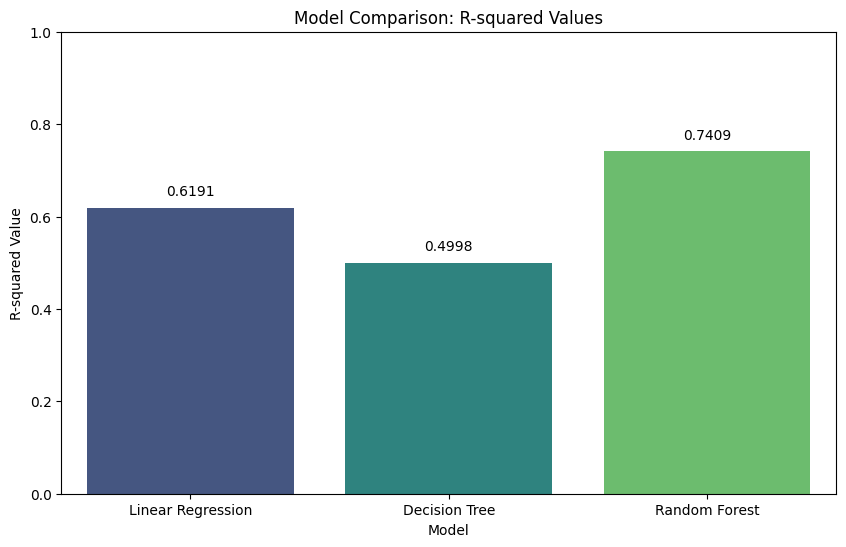

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the plot
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [0.6191, 0.4998, 0.7409]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')

# Add title and labels
plt.title('Model Comparison: R-squared Values')
plt.xlabel('Model')
plt.ylabel('R-squared Value')

# Add text annotations to the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] + 0.02, str(r2_scores[i]), ha='center', va='bottom')

# Show the plot
plt.ylim(0, 1)
plt.show()


Based on the evaluation of the three regression models using the R-squared metric, we can observe distinct differences in their performance. The Linear Regression model achieved an R-squared value of 0.6191, indicating that it explains approximately 61.91% of the variance in the asteroid diameter data. While this is a reasonably good fit, it suggests that there is still a substantial amount of variance that the model does not capture. The Decision Tree model performed less effectively, with an R-squared value of 0.4998, meaning it only explains about 49.98% of the variance. This lower performance could be due to the model's tendency to overfit the training data and not generalize well to the test data. In contrast, the Random Forest model outperformed the other models with an R-squared value of 0.7409, indicating that it explains 74.09% of the variance in the data. This superior performance can be attributed to the ensemble nature of the Random Forest, which combines the predictions of multiple decision trees to improve generalization and robustness. Overall, the Random Forest model appears to be the most effective for predicting asteroid diameters in this dataset.

# Generating Synthetic Data with CTGAN

In this section, we will generate synthetic data to augment our asteroid dataset using the CTGAN model. Synthetic data can help address issues such as data imbalance and lack of sufficient data.

## Install Required Libraries

We first need to install the necessary libraries for generating and evaluating synthetic data.


In [69]:
!pip install sdv
!pip install table_evaluator


## Initialize and Train the CTGAN Model

We will use the `CTGANSynthesizer` from the SDV library to train a GAN on our asteroid dataset. This will allow us to generate synthetic samples that resemble the real data.


# Analysis of Synthetic Data


The synthetic data generated using the CTGAN model closely resembles the original dataset in terms of statistical properties. The plots comparing the log means and standard deviations (STDs) of numeric data indicate strong alignment between the synthetic and real data, demonstrating that the model effectively captured the overall distribution of the numerical features. The cumulative sum plots and probability density functions (PDFs) for each feature further confirm that the synthetic data maintains similar distributions to the real data, with only minor deviations observed in certain features.

The categorical features' proportions, as shown in the bar plots, also match well between the real and synthetic data, ensuring the preservation of distribution across categories. The correlation matrices for both datasets reveal that the relationships between features are well-replicated in the synthetic data, with minor differences highlighted. Additionally, the PCA plots illustrate that the synthetic data covers a similar range and distribution as the real data, further validating the effectiveness of the synthetic data generation process.

In conclusion, the CTGAN-generated synthetic data effectively mirrors the real data in terms of distribution and relationships among features. This validation confirms that the synthetic data can be reliably used alongside the real data, enhancing the dataset and enabling more robust analysis and modeling.


# Training and Evaluating a Random Forest Model with Synthetic Data

### Methodological Insights 🧩
- **Data Preprocessing**: Rigorous data preprocessing steps, including handling missing values, encoding categorical variables, and detecting outliers, were crucial in ensuring the quality and integrity of the dataset.
- **Evaluation Metrics**: The use of R2 scores provided a clear and interpretable measure of the models' performance, facilitating a straightforward comparison between different models and datasets.

## Final Thoughts 💡
This project showcases the potential of synthetic data to augment real-world datasets, particularly in scenarios where data is limited or imbalanced. The use of advanced machine learning techniques, combined with thorough data preprocessing and evaluation, enables the development of robust models capable of making accurate predictions.

In [70]:
import pickle

In [71]:
pickle.dump(rf,open('asteroid_model.pkl','wb'))

In [72]:
pickled_model=pickle.load(open('asteroid_model.pkl','rb'))

In [73]:
pickled_model.predict(x_test)

array([6.7949 , 4.32584, 2.71604, ..., 2.64597, 2.9744 , 4.32373])